1. Title: Bank Marketing

Sources Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

Past Usage:

The full dataset was described and analyzed in:

S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

Relevant Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

There are two datasets: 1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010). 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv. The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

Number of Attributes: 16 + output attribute.

Attribute information:

For more information, read [Moro et al., 2011].

Input variables:

bank client data:
1 - age (numeric) 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) 4 - education (categorical: "unknown","secondary","primary","tertiary") 5 - default: has credit in default? (binary: "yes","no") 6 - balance: average yearly balance, in euros (numeric) 7 - housing: has housing loan? (binary: "yes","no") 8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 10 - day: last contact day of the month (numeric) 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 12 - duration: last contact duration, in seconds (numeric)

other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) 15 - previous: number of contacts performed before this campaign and for this client (numeric) 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target): 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [3]:
path = 'bank.csv'
df = pd.read_csv(path,sep=',')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


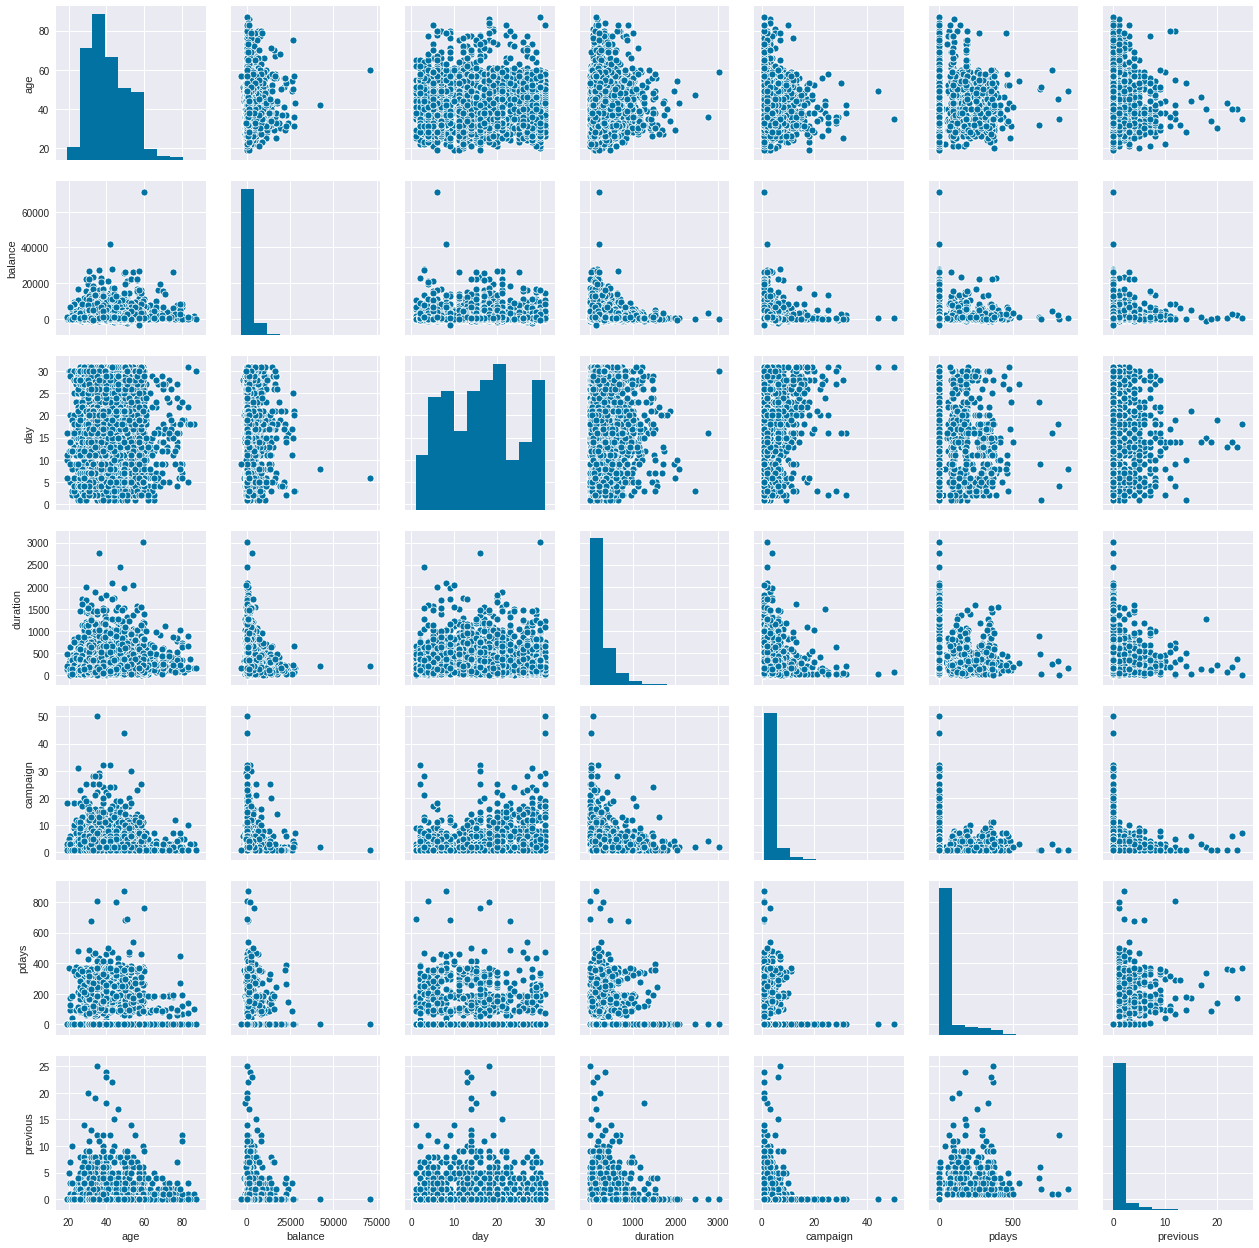

In [118]:
sns.pairplot(df)

Informando sobre o arquivo e modificando o tipo de dados

In [4]:
#Antes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.age = df.age.astype('int32')
df.day = df.day.astype('int32')
df.duration = df.duration.astype('int32')
df.pdays = df.pdays.astype('int32')
df.previous = df.previous.astype('int32')
df.job = df.job.astype('category')
df.marital = df.marital.astype('category')
df.education = df.education.astype('category')
df.default = df.default.astype('category')
df.housing = df.housing.astype('category')
df.loan = df.loan.astype('category')
df.contact = df.contact.astype('category')
df.month = df.month.astype('category')
df.poutcome = df.poutcome.astype('category')
df.y = df.y.astype('category')

In [6]:
#Depois
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int32
job          4521 non-null category
marital      4521 non-null category
education    4521 non-null category
default      4521 non-null category
balance      4521 non-null int64
housing      4521 non-null category
loan         4521 non-null category
contact      4521 non-null category
day          4521 non-null int32
month        4521 non-null category
duration     4521 non-null int32
campaign     4521 non-null int64
pdays        4521 non-null int32
previous     4521 non-null int32
poutcome     4521 non-null category
y            4521 non-null category
dtypes: category(10), int32(5), int64(2)
memory usage: 205.0 KB


In [7]:
#Verificando se tem colunas sem dados
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Divindo as colunas de categorias e classe

In [10]:
X = df.iloc[:,0:15].values

In [11]:
Y = df.iloc[:,16].values

In [12]:
labelencoder = LabelEncoder()

In [13]:
X[:,1] = labelencoder.fit_transform(X[:,1])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,3] = labelencoder.fit_transform(X[:,3])
X[:,4] = labelencoder.fit_transform(X[:,4])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,7] = labelencoder.fit_transform(X[:,7])
X[:,8] = labelencoder.fit_transform(X[:,8])
X[:,10] = labelencoder.fit_transform(X[:,10])
X[:,14] = labelencoder.fit_transform(X[:,14])
Y = labelencoder.fit_transform(Y)

Inicio do Treinamento

In [14]:
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X, Y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [15]:
modelo1 = DecisionTreeClassifier(criterion = 'entropy')
modelo1.fit(X_treinamento, Y_treinamento)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
export_graphviz(modelo1, out_file = 'modelo1.dot')

In [130]:
previsoes1 = modelo1.predict(X_teste)

In [131]:
previsoes1[0:5]

array([0, 0, 0, 0, 0])

In [132]:
Y_teste[0:5]

array([0, 0, 0, 0, 0])

In [133]:
accuracy_score(Y_teste, previsoes1)

0.8585114222549742

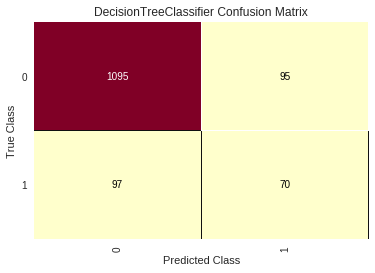

In [134]:
confusao1 = ConfusionMatrix(modelo1)
confusao1.fit(X_treinamento, Y_treinamento)
confusao1.score(X_teste, Y_teste)
confusao1.poof()